In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crypto-data/Crypto.json
/kaggle/input/crypto-data/Crypto.csv


In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [47]:
crypto = pd.read_csv("/kaggle/input/crypto-data/Crypto.csv")

In [48]:
crypto.shape

(21347, 12)

In [49]:
crypto.head(5)

,name,abbr,crypturl,price,volume24hrs,marketcap,circulatingsupply,maxsupply,totalsupply,date_taken,Unnamed: 10,Unnamed: 11
0,Bitcoin,BTC,https://crypto.com/price/bitcoin,62732.6700,272076.9766,"2,51,418.65",3.065439e+06,876052496.2,437497786.1,09-08-2007,NaN,NaN
1,Ethereum,ETH,https://crypto.com/price/ethereum,3027.2200,981408.7883,"5,02,924.62",2.326224e+06,444082823.2,705224728.4,13-12-2007,NaN,NaN
2,Tether,USDT,https://crypto.com/price/tether,0.9999,944792.0394,"8,15,637.23",2.207000e+06,604510133.4,716566396.6,03-03-2004,NaN,NaN
3,BNB,BNB,https://crypto.com/price/bnb,593.8500,556334.5330,"3,23,746.05",2.400147e+05,150451882.8,685308596.6,06-06-2001,NaN,NaN
4,Solana,SOL,https://crypto.com/price/solana,152.5900,866929.0575,"8,05,143.57",2.957790e+06,284280494.2,647877254.0,06-08-2019,NaN,NaN


In [50]:
crypto.isnull().sum()

name                     0
abbr                     0
crypturl                 0
price                    0
volume24hrs              0
marketcap                0
circulatingsupply        0
maxsupply                0
totalsupply              0
date_taken               0
Unnamed: 10          21347
Unnamed: 11          21347
dtype: int64

In [51]:
#Since columns Unnamed: 10 and Unnamed: 11 both have all null values, we will drop this column
crypto.drop(['Unnamed: 10','Unnamed: 11'], axis = 1, inplace=True)

In [52]:
crypto.describe()

,price,volume24hrs,circulatingsupply,maxsupply,totalsupply
count,2.134700e+04,21347.000000,2.134700e+04,2.134700e+04,2.134700e+04
mean,7.524758e+04,488514.745820,2.109302e+06,5.000418e+08,5.005749e+08
std,1.092127e+07,283506.240054,1.225969e+06,2.876037e+08,2.893756e+08
min,0.000000e+00,103.983721,1.669758e+02,2.041145e+04,5.213366e+04
25%,1.000000e-05,241306.259550,1.041184e+06,2.518438e+08,2.498050e+08
50%,9.548000e-04,487505.451700,2.103832e+06,5.013132e+08,5.028731e+08
75%,3.687500e-02,733224.487850,3.163273e+06,7.469720e+08,7.507950e+08
max,1.595659e+09,981555.184500,4.251433e+06,9.989293e+08,9.999478e+08


In [53]:
crypto['marketcap'] 

0        2,51,418.65
1        5,02,924.62
2        8,15,637.23
3        3,23,746.05
4        8,05,143.57
            ...     
21342    3,11,061.69
21343    7,33,230.16
21344      81,533.88
21345    1,92,828.64
21346    2,61,747.39
Name: marketcap, Length: 21347, dtype: object

In [54]:
#Converting 'marketcap' string values(as it has commas in between) to float values
crypto['marketcap'] = crypto['marketcap'].str.replace(',', '').astype(float)
print(crypto['marketcap'])

0        251418.65
1        502924.62
2        815637.23
3        323746.05
4        805143.57
           ...    
21342    311061.69
21343    733230.16
21344     81533.88
21345    192828.64
21346    261747.39
Name: marketcap, Length: 21347, dtype: float64


In [63]:
#features (independent variable)
X = crypto[['price', 'volume24hrs', 'marketcap', 'circulatingsupply', 'maxsupply', 'totalsupply']]

#target (dependent variable)
Y = crypto['price']

<Axes: >

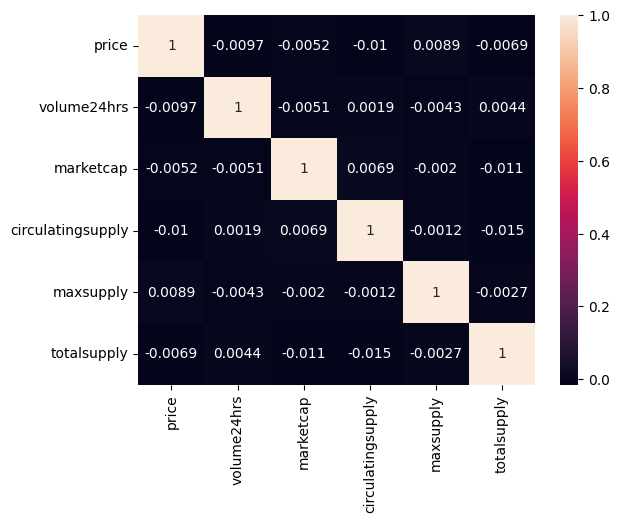

In [60]:
corr = X.corr()
sns.heatmap(corr, annot=True)

In [64]:
#Splitting the dataset into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 13)

In [66]:
#Model generation
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [67]:
#Model Prediction
Y_pred = model.predict(X_test)

In [114]:
#To display the values without their indices, converting Pandas Series to a list before printing (can be converted to numpy array as well)
Y_pred_list = Y_pred.tolist()
Y_test_list = Y_test.tolist()

print("Predicted Values:\n", Y_pred_list[:5])
print("Actual Values:\n", Y_test_list[:5])

Predicted Values:
 [62816.70000001214, 0.0007270912860054473, 0.012470024979336764, 0.009348006258028431, 0.061910024869416554]
Actual Values:
 [62816.7, 0.0007271, 0.01247, 0.009348, 0.06191]


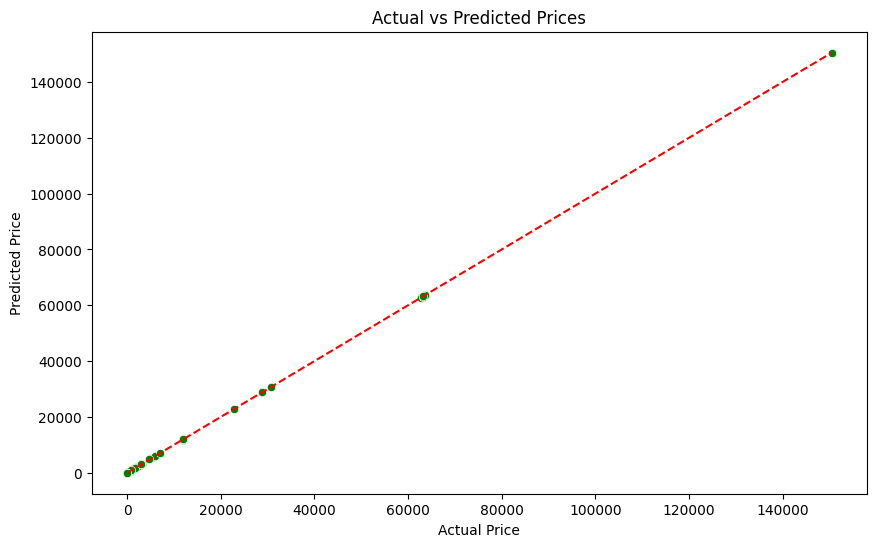

In [101]:
plt.figure(figsize = (10,6))
sns.scatterplot(x=Y_test, y=Y_pred, color='green')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
#plt.gca().set_facecolor('beige')   # Change background color to beige
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



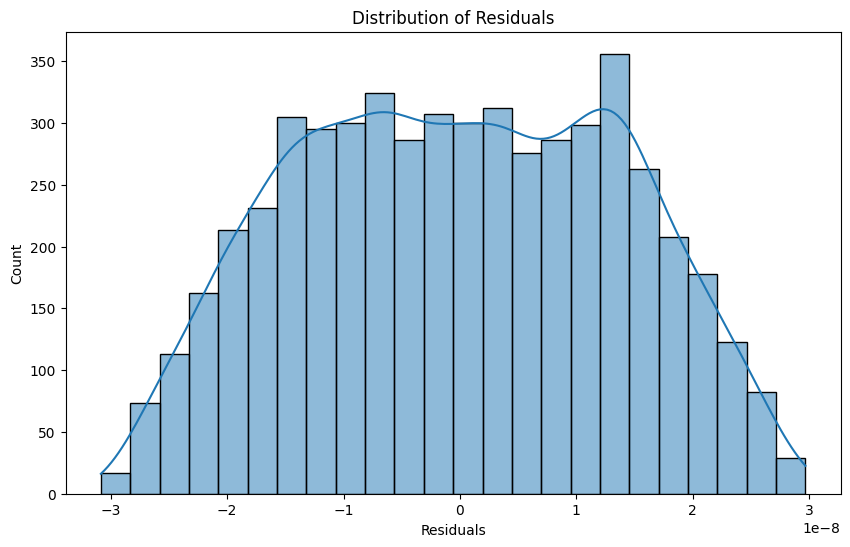

In [108]:
# Distribution plot of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()